In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df.head(8)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [8]:
X.head(4)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000


In [9]:
y.head(4)

0    0
1    1
2    1
3    1
Name: Survived, dtype: int64

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
X_train['age_imputed']=X_train['Age']
X_test['age_imputed']=X_test['Age']

In [12]:
X_train.head(4)

,Age,Fare,age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0


In [13]:
X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train["Age"].dropna().sample(X_train['Age'].isnull().sum()).values
# [X_train['age_imputed'].isnull()] find nan values within age imputed, X_train["Age"].dropna() remove the age with nan values, sample(X_train['Age'].isnull().sum())
# find randon values, how much? number of random values is equa to drpped missing values
X_test['age_imputed'][X_test['age_imputed'].isnull()]=X_test["Age"].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6100\1417298174.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['age_imputed'][X_train['age_imputed'].isnull()]=X_train["Age"].dropna().sample(X_train['Age'].isnull().sum()).values
C

In [14]:
X_train["Age"].dropna().sample(X_train['Age'].isnull().sum()).values

array([34.  , 34.5 , 29.  , 20.  , 53.  , 54.  , 51.  , 27.  , 28.  ,
       36.  , 21.  , 13.  , 19.  , 36.  , 30.5 , 56.  , 19.  , 17.  ,
       39.  , 24.  , 27.  , 24.  , 33.  , 25.  , 52.  , 28.  , 22.  ,
       28.  , 36.  , 26.  , 14.  ,  3.  , 40.  , 23.  ,  9.  , 16.  ,
       26.  , 25.  , 32.  , 25.  , 42.  , 16.  , 31.  , 22.  , 33.  ,
       25.  , 26.  , 18.  , 21.  , 30.  , 11.  , 61.  , 24.  , 22.  ,
       18.  , 22.  , 41.  , 21.  ,  0.42, 45.  ,  4.  , 49.  , 22.  ,
       28.  , 56.  , 36.  ,  3.  , 45.5 , 20.  ,  9.  , 30.  , 33.  ,
       43.  , 28.  , 16.  , 29.  , 42.  , 19.  , 31.  , 42.  , 38.  ,
       43.  , 35.  , 39.  , 10.  , 27.  , 16.  , 37.  , 16.  , 24.  ,
       32.  , 43.  , 32.  , 46.  , 27.  , 46.  , 24.  ,  1.  ,  4.  ,
        5.  , 16.  , 48.  , 36.  , 35.  , 31.  , 62.  , 31.  , 23.  ,
       21.  , 11.  , 30.  , 49.  , 26.  , 50.  , 52.  , 16.  , 24.  ,
       25.  , 14.5 , 30.  , 41.  , 31.  , 19.  , 32.  ,  7.  , 30.  ,
       22.  , 15.  ,

In [15]:

X_train['Age'].isnull().sum()

148

In [16]:
X_train.sample(20)

,Age,Fare,age_imputed
129,45.0,6.9750,45.0
708,22.0,151.5500,22.0
349,42.0,8.6625,42.0
570,62.0,10.5000,62.0
373,22.0,135.6333,22.0
159,NaN,69.5500,2.0
353,25.0,17.8000,25.0
484,25.0,91.0792,25.0
718,NaN,15.5000,58.0
574,16.0,8.0500,16.0


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6100\892496874.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6100\892496874.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_trai

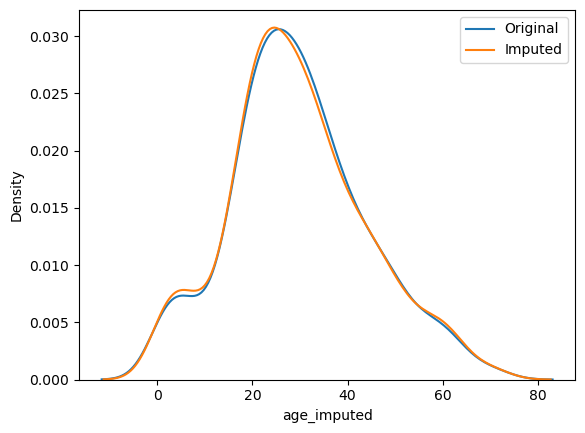

In [17]:

#plot pde for original age values and imputed age by random sample imputer
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [18]:
X_train['Age'].var()


204.3495133904614

In [19]:
X_train['age_imputed'].var()

209.46105569126405

In [20]:

X_train[['Fare', 'Age', 'age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2368.246832,71.512440,49.647560
Age,71.512440,204.349513,204.349513
age_imputed,49.647560,204.349513,209.461056


<Axes: >

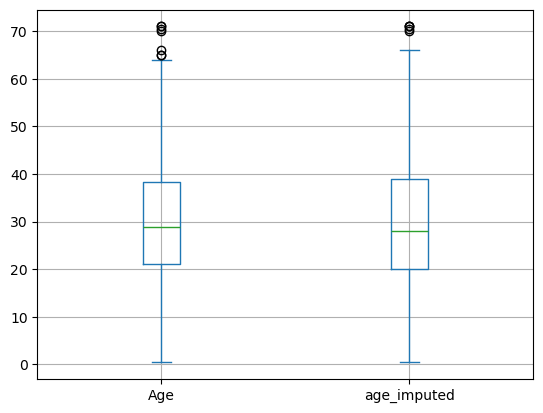

In [21]:
X_train[['Age','age_imputed']].plot(kind='box',grid=True)

### categorical data

In [22]:
observation=X_test.iloc[0]
sample_value=X_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))
#From the non-missing Age values in the training set, randomly sample 1 value — using the Fare of the observation as a random seed.
#This ensures deterministic randomness i.e., the same Fare value always gives the same sampled Age.

In [23]:
data = pd.read_csv('house_train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [24]:
data.head(7)

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
5,NaN,TA,143000
6,Gd,TA,307000


In [25]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [26]:

X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [27]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [28]:
X_train.head(8)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
1091,NaN,TA,160000,TA,NaN
590,NaN,TA,185900,TA,NaN
1298,Gd,TA,160000,TA,Gd


In [29]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_6100\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQu

In [30]:

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [31]:

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.536476
Fa,0.040917,0.054994
Po,0.027823,0.037037
Ex,0.024550,0.032548


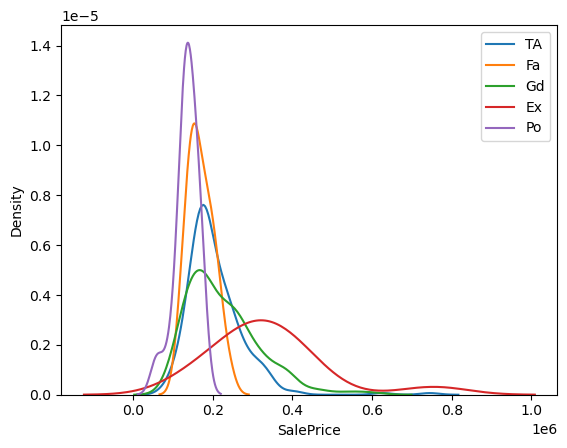

In [32]:
#before imputation

for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

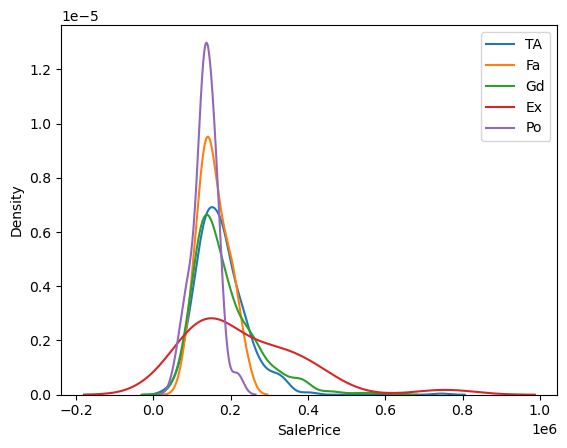

In [33]:
#after imputation
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

In [34]:
#fa, gd, ex changed, po, ta seems to be same

### missing indicator

In [35]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [36]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])

In [37]:
df.head()
X = df.drop(columns=['Survived'])
y = df['Survived']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:

X_train.head(9)

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
213,30.0,13.0000
157,30.0,8.0500
780,13.0,7.2292
572,36.0,26.3875


In [42]:
si=SimpleImputer()
X_train_trf=si.fit_transform(X_train)
X_test_trf=si.transform(X_test)

In [43]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [44]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [45]:
mi=MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [46]:
mi.features_

array([0], dtype=int64)

In [48]:
X_train_missing=mi.transform(X_train)
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [49]:
X_test_missing=mi.transform(X_test)
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [50]:

X_train['Age_NA'] = X_train_missing

In [51]:
X_test

,Age,Fare
707,42.0,26.2875
37,21.0,8.0500
615,24.0,65.0000
169,28.0,56.4958
68,17.0,7.9250
...,...,...
89,24.0,8.0500
80,22.0,9.0000
846,NaN,69.5500
870,26.0,7.8958


In [52]:
X_test['Age_NA'] = X_test_missing

In [53]:
X_train

,Age,Fare,Age_NA
30,40.0,27.7208,False
10,4.0,16.7000,False
873,47.0,9.0000,False
182,9.0,31.3875,False
876,20.0,9.8458,False
...,...,...,...
534,30.0,8.6625,False
584,NaN,8.7125,True
493,71.0,49.5042,False
527,NaN,221.7792,True


In [54]:

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

0clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [57]:
si =SimpleImputer(add_indicator=True)
X_train=si.fit_transform(X_train)
X_test=si.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [59]:
clf.fit(X_train_trf2,y_train)
y_pred=clf.predict(X_test_trf2)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [60]:
# if you are using sklearn ka simputer just set add_indicator to true , no need to call missing imputer
#but in pandas we've to call missing indicator as an object

### automatically select parameters for imputation

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [62]:
df=pd.read_csv('titanic_train.csv')
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [63]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
X=df.drop(columns=['Survived'])
y=df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,male,40.0,0,0,27.7208,C
10,3,female,4.0,1,1,16.7000,S
873,3,male,47.0,0,0,9.0000,S
182,3,male,9.0,4,2,31.3875,S
876,3,male,20.0,0,0,9.8458,S


In [67]:
#preprocessing steps on titanic data
#impute age
#encode age and fare - ordinal numerical data
#encode sex and embarked - nominal categorical data
#divide data into numerical and categorical part

In [68]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

from sklearn import set_config

set_config(display='diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [70]:
#cool, next gridsearch cv to find best parameters for model training

In [71]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [72]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.788


In [74]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.787852
5,1.0,most_frequent,median,0.787852
6,1.0,constant,mean,0.787852
7,1.0,constant,median,0.787852
8,10.0,most_frequent,mean,0.787852
9,10.0,most_frequent,median,0.787852
10,10.0,constant,mean,0.787852
11,10.0,constant,median,0.787852
12,100.0,most_frequent,mean,0.787852
13,100.0,most_frequent,median,0.787852
